In [42]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [50]:

dataDir='/home/hungnq/hungnq_2/yolov7/coco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

loading annotations into memory...
Done (t=0.91s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

In [51]:
filterClasses = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light','fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(supNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

Number of images containing all the  classes: 2693


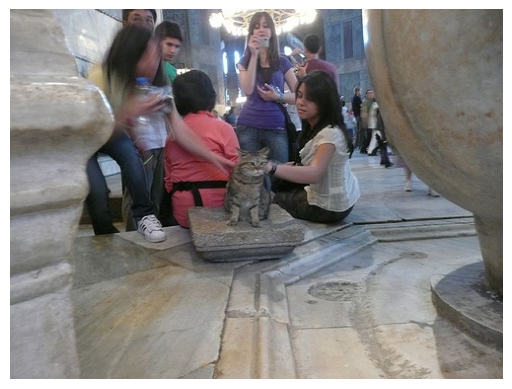

In [53]:
# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

In [37]:
img

{'license': 5,
 'file_name': '000000274708.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000274708.jpg',
 'height': 612,
 'width': 612,
 'date_captured': '2013-11-19 18:20:57',
 'flickr_url': 'http://farm7.staticflickr.com/6039/5899874218_128cd80da6_z.jpg',
 'id': 274708}

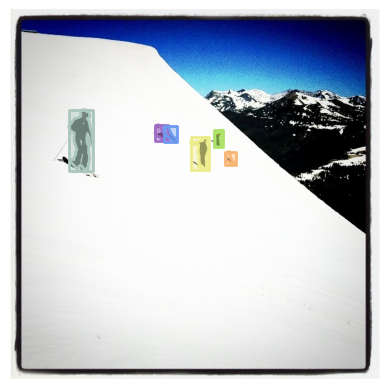

In [39]:
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [40]:
annIds

[488647, 497456, 522324, 528558, 537826, 1691176]

In [64]:
anns

[{'segmentation': [[105.64,
    203.96,
    99.93,
    200.37,
    96.77,
    194.45,
    97.19,
    192.13,
    102.05,
    186.43,
    106.06,
    180.73,
    111.34,
    179.04,
    116.62,
    176.93,
    116.62,
    172.07,
    116.83,
    167.21,
    121.26,
    165.31,
    128.44,
    166.58,
    130.77,
    171.22,
    131.61,
    175.45,
    131.61,
    177.98,
    128.23,
    179.46,
    127.6,
    180.3,
    130.55,
    185.58,
    132.46,
    196.14,
    134.99,
    204.17,
    135.83,
    214.09,
    137.1,
    220.43,
    136.47,
    223.81,
    134.99,
    224.65,
    132.88,
    224.02,
    131.61,
    223.17,
    130.55,
    212.61,
    128.23,
    206.7,
    127.6,
    205.01,
    126.96,
    209.87,
    126.54,
    212.19,
    126.96,
    221.06,
    129.71,
    225.92,
    129.5,
    236.9,
    130.77,
    240.91,
    130.77,
    247.25,
    130.34,
    252.1,
    128.87,
    254.85,
    129.08,
    260.76,
    128.87,
    263.08,
    126.54,
    262.24,
    125.28,

In [54]:
# Create custom dataset for training

# Create a directory to store the images and annotations 
images = coco.loadImgs(imgIds)
images[0]

{'license': 3,
 'file_name': '000000532481.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-20 16:28:24',
 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
 'id': 532481}

In [55]:
!mkdir -p /home/hungnq/hungnq_2/yolov7/coco/custom/

In [74]:
with open("/home/hungnq/hungnq_2/yolov7/coco/custom/train_custom.txt", "w") as f:
    for img in images:
        f.write(f"./images/train/{img['file_name']}\n")

In [71]:
import cv2

for image in images:
    I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,image['file_name']))
    cv2.imwrite(f"/home/hungnq/hungnq_2/yolov7/coco/custom/images/train/{image['file_name']}", I)

In [70]:
# save label with category and bbox
for image in images:
    # get annotation
    annIds = coco.getAnnIds(imgIds=image['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    rename = image['file_name'].replace("jpg", "txt")
    with open(f"/home/hungnq/hungnq_2/yolov7/coco/custom/labels/train/{rename}", "w") as f:
        for ann in anns:
            x, y, w, h = ann['bbox']
            x_center = x + w/2
            y_center = y + h/2
            x_center /= image['width']
            y_center /= image['height']
            w /= image['width']
            h /= image['height']
            f.write(f"{ann['category_id']} {x_center} {y_center} {w} {h}\n")